<a href="https://colab.research.google.com/github/Navjotkhatri/Productionization_of_ML_Systems_in_Travel_Industry/blob/main/Productionization_of_ML_Systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**  

# ***Integrating MLOps for Predictive and Recommender Systems in Travel***



##### **Project Type**    - Productionization of ML Systems


##### **Contribution**    - Individual


# **Project Summary -**

In the realm of travel and tourism, the intersection of data analytics and machine learning presents an opportunity to revolutionize the way travel experiences are curated and delivered. This capstone project revolves around a trio of datasets - users, flights, and hotels - each providing a unique perspective on travel patterns and preferences. The goal is to leverage these datasets to build and deploy sophisticated machine learning models, serving a dual purpose: enhancing predictive capabilities in travel-related decision-making and mastering the art of MLOps through hands-on application.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


# **Project Objectives**

**1. Regression Model Development:**

Build a regression model to predict the price of a flight using the flights.csv dataset. Focus on feature selection, model training, and validation to ensure accuracy and reliability.

**2. REST API for Regression Model:**

Develop a REST API using Flask to serve the flight price prediction model, enabling real-time price predictions.

**3. Containerization:**

Package and deploy the flight price prediction model using Docker, ensuring portability and ease of deployment.

**4. Kubernetes for Scalability:**

Deploy the model using Kubernetes to manage scalability and handle varying loads efficiently.

**5. Automated Workflows with Apache Airflow:**

Design and implement automated workflows for managing the travel data, specifically for the regression models. Develop Directed Acyclic Graphs (DAGs) to orchestrate complex workflows in an efficient and manageable way.

**6. CI/CD Pipeline with Jenkins:**

Implement a Continuous Integration/Continuous Deployment (CI/CD) pipeline using Jenkins for consistent and reliable deployment of the travel price prediction model.

**7. Model Tracking with MLFlow:**

Utilize MLFlow for tracking and managing different versions of the travel price prediction model, ensuring a systematic approach to model iteration and deployment.

**8. Gender Classification Model:**

Deploy a classification model to categorize a user's gender.

**9. Travel Recommendation Model:**

Build a recommendation model to provide hotel suggestions based on user preferences and historical data. Develop a Streamlit web application to display insights and visualizations derived from the deployed travel recommendation model, offering an interactive and user-friendly interface for data exploration.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from prettytable import PrettyTable

### Dataset Loading

In [3]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
flights_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Specialisation Track/Model-1 Productionization of ML Systems/CapstoneProject_Travel_Package/traveldata/flights.csv")
hotels_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Specialisation Track/Model-1 Productionization of ML Systems/CapstoneProject_Travel_Package/traveldata/hotels.csv")
users_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Specialisation Track/Model-1 Productionization of ML Systems/CapstoneProject_Travel_Package/traveldata/users.csv")

### Dataset First View

In [5]:
# Dataset First Look
flights_df.head()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019


In [6]:
flights_df.tail()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
271883,135941,1339,Campo Grande (MS),Florianopolis (SC),firstClass,1446.34,1.49,573.81,CloudFy,07/12/2020
271884,135942,1339,Florianopolis (SC),Natal (RN),economic,726.95,1.84,709.37,CloudFy,07/16/2020
271885,135942,1339,Natal (RN),Florianopolis (SC),economic,873.07,1.84,709.37,CloudFy,07/20/2020
271886,135943,1339,Florianopolis (SC),Rio de Janeiro (RJ),economic,313.62,1.21,466.30,CloudFy,07/23/2020
271887,135943,1339,Rio de Janeiro (RJ),Florianopolis (SC),economic,533.69,1.21,466.30,CloudFy,07/26/2020


**Flights Dataset:**

travelCode: Identifier for the travel.

userCode: User identifier(linked to the Users dataset)

from: Origin of the flight.

to: Destination of the flight.

flightType: Type of flight (e.g., first class).

price: Price of the flight.

time: Flight duration.

distance: Distance of the flight.

agency: Flight agency.

date: Date of the flight.

In [7]:
hotels_df.head()

,travelCode,userCode,name,place,days,price,total,date
0,0,0,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019
1,2,0,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019
2,7,0,Hotel K,Salvador (BH),3,263.41,790.23,11/14/2019
3,11,0,Hotel K,Salvador (BH),4,263.41,1053.64,12/12/2019
4,13,0,Hotel A,Florianopolis (SC),1,313.02,313.02,12/26/2019


In [8]:
hotels_df.tail()

,travelCode,userCode,name,place,days,price,total,date
40547,135938,1339,Hotel BP,Brasilia (DF),3,247.62,742.86,06/18/2020
40548,135939,1339,Hotel BP,Brasilia (DF),1,247.62,247.62,06/25/2020
40549,135940,1339,Hotel BW,Campo Grande (MS),3,60.39,181.17,07/02/2020
40550,135941,1339,Hotel BW,Campo Grande (MS),3,60.39,181.17,07/09/2020
40551,135942,1339,Hotel BD,Natal (RN),4,242.88,971.52,07/16/2020


**Hotels Dataset:**

travelCode: Identifier for the travel, similar to the Flights dataset.

userCode: User identifier(linked to the Users dataset)

name: Name of the hotel.

place: Location of the hotel.

days: Number of days of the hotel stay.

price: Price per day.

total: Total price for the stay.

date: Date of the hotel booking.

In [9]:
users_df.head()

,code,company,name,gender,age
0,0,4You,Roy Braun,male,21
1,1,4You,Joseph Holsten,male,37
2,2,4You,Wilma Mcinnis,female,48
3,3,4You,Paula Daniel,female,23
4,4,4You,Patricia Carson,female,44


In [10]:
users_df.tail()

,code,company,name,gender,age
1335,1335,Umbrella LTDA,Albert Garroutte,male,23
1336,1336,Umbrella LTDA,Kim Shores,female,40
1337,1337,Umbrella LTDA,James Gimenez,male,28
1338,1338,Umbrella LTDA,Viola Agosta,female,52
1339,1339,Umbrella LTDA,Paul Rodriguez,male,35


**Users Dataset:**

code: User identifier.

company: Associated company.

name: Name of the user.

gender: Gender of the user.

age: Age of the user.

### Dataset Rows & Columns count

In [11]:
# Dataset Rows & Columns count
flights_df.shape

(271888, 10)

In [12]:
hotels_df.shape

(40552, 8)

In [13]:
users_df.shape

(1340, 5)

### Dataset Information

In [14]:
# Dataset Info
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   travelCode  271888 non-null  int64  
 1   userCode    271888 non-null  int64  
 2   from        271888 non-null  object 
 3   to          271888 non-null  object 
 4   flightType  271888 non-null  object 
 5   price       271888 non-null  float64
 6   time        271888 non-null  float64
 7   distance    271888 non-null  float64
 8   agency      271888 non-null  object 
 9   date        271888 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 20.7+ MB


In [15]:
hotels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40552 entries, 0 to 40551
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   travelCode  40552 non-null  int64  
 1   userCode    40552 non-null  int64  
 2   name        40552 non-null  object 
 3   place       40552 non-null  object 
 4   days        40552 non-null  int64  
 5   price       40552 non-null  float64
 6   total       40552 non-null  float64
 7   date        40552 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 2.5+ MB


In [16]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   code     1340 non-null   int64 
 1   company  1340 non-null   object
 2   name     1340 non-null   object
 3   gender   1340 non-null   object
 4   age      1340 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 52.5+ KB


#### Duplicate Values

In [17]:
# Dataset Duplicate Value Count
flights_df.duplicated().sum()

0

In [18]:
hotels_df.duplicated().sum()

0

In [19]:
users_df.duplicated().sum()

0

#### Missing Values/Null Values

In [20]:
# Missing Values/Null Values Count
flights_df.isnull().sum()

travelCode    0
userCode      0
from          0
to            0
flightType    0
price         0
time          0
distance      0
agency        0
date          0
dtype: int64

In [21]:
hotels_df.isnull().sum()

travelCode    0
userCode      0
name          0
place         0
days          0
price         0
total         0
date          0
dtype: int64

In [22]:
users_df.isnull().sum()

code       0
company    0
name       0
gender     0
age        0
dtype: int64

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [23]:
# Dataset Columns
flights_df.columns

Index(['travelCode', 'userCode', 'from', 'to', 'flightType', 'price', 'time',
       'distance', 'agency', 'date'],
      dtype='object')

In [24]:
hotels_df.columns

Index(['travelCode', 'userCode', 'name', 'place', 'days', 'price', 'total',
       'date'],
      dtype='object')

In [25]:
users_df.columns

Index(['code', 'company', 'name', 'gender', 'age'], dtype='object')

In [26]:
# Dataset Describe
flights_df.describe()

,travelCode,userCode,price,time,distance
count,271888.000000,271888.000000,271888.00000,271888.000000,271888.000000
mean,67971.500000,667.505495,957.37503,1.421147,546.955535
std,39243.724665,389.523127,362.31189,0.542541,208.851288
min,0.000000,0.000000,301.51000,0.440000,168.220000
25%,33985.750000,326.000000,672.66000,1.040000,401.660000
50%,67971.500000,659.000000,904.00000,1.460000,562.140000
75%,101957.250000,1011.000000,1222.24000,1.760000,676.530000
max,135943.000000,1339.000000,1754.17000,2.440000,937.770000


In [27]:
hotels_df.describe()

,travelCode,userCode,days,price,total
count,40552.000000,40552.000000,40552.000000,40552.000000,40552.000000
mean,67911.794461,666.963726,2.499679,214.439554,536.229513
std,39408.199333,391.136794,1.119326,76.742305,319.331482
min,0.000000,0.000000,1.000000,60.390000,60.390000
25%,33696.750000,323.000000,1.000000,165.990000,247.620000
50%,67831.000000,658.000000,2.000000,242.880000,495.240000
75%,102211.250000,1013.000000,4.000000,263.410000,742.860000
max,135942.000000,1339.000000,4.000000,313.020000,1252.080000


In [28]:
users_df.describe()

,code,age
count,1340.000000,1340.000000
mean,669.500000,42.742537
std,386.968991,12.869779
min,0.000000,21.000000
25%,334.750000,32.000000
50%,669.500000,42.000000
75%,1004.250000,54.000000
max,1339.000000,65.000000


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [29]:
# Check Unique Values for each variable.
flights_df.nunique()

travelCode    135944
userCode        1335
from               9
to                 9
flightType         3
price            490
time              33
distance          35
agency             3
date             999
dtype: int64

In [30]:
hotels_df.nunique()

travelCode    40552
userCode       1310
name              9
place             9
days              4
price             9
total            36
date            199
dtype: int64

In [31]:
users_df.nunique()

code       1340
company       5
name       1338
gender        3
age          45
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [32]:
# Write your code to make your dataset analysis ready.
flights_df.head()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019


**Flights Dataset:**

travelCode: Identifier for the travel.

userCode: User identifier(linked to the Users dataset)

from: Origin of the flight.

to: Destination of the flight.

flightType: Type of flight (e.g., first class).

price: Price of the flight.

time: Flight duration.

distance: Distance of the flight.

agency: Flight agency.

date: Date of the flight.

In [33]:
flights_df['from'].value_counts()

from
Florianopolis (SC)     57317
Aracaju (SE)           37224
Campo Grande (MS)      34748
Brasilia (DF)          30779
Recife (PE)            30480
Natal (RN)             23796
Sao Paulo (SP)         23625
Salvador (BH)          17104
Rio de Janeiro (RJ)    16815
Name: count, dtype: int64

In [34]:
flights_df['to'].value_counts()

to
Florianopolis (SC)     57317
Aracaju (SE)           37224
Campo Grande (MS)      34748
Brasilia (DF)          30779
Recife (PE)            30480
Natal (RN)             23796
Sao Paulo (SP)         23625
Salvador (BH)          17104
Rio de Janeiro (RJ)    16815
Name: count, dtype: int64

In [35]:
flights_df['flightType'].value_counts()

flightType
firstClass    116418
premium        78004
economic       77466
Name: count, dtype: int64

In [36]:
flights_df['agency'].value_counts()

agency
Rainbow        116752
CloudFy        116378
FlyingDrops     38758
Name: count, dtype: int64

In [37]:
flights_df['route']=flights_df['from']+'-'+flights_df['to']

In [38]:
flights_df.head()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date,route
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019,Recife (PE)-Florianopolis (SC)
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019,Florianopolis (SC)-Recife (PE)
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019,Brasilia (DF)-Florianopolis (SC)
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019,Florianopolis (SC)-Brasilia (DF)
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019,Aracaju (SE)-Salvador (BH)


In [39]:
flights_df['route'].value_counts()

route
Florianopolis (SC)-Aracaju (SE)         8643
Aracaju (SE)-Florianopolis (SC)         8643
Florianopolis (SC)-Campo Grande (MS)    8253
Campo Grande (MS)-Florianopolis (SC)    8253
Brasilia (DF)-Florianopolis (SC)        7779
                                        ... 
Natal (RN)-Rio de Janeiro (RJ)           950
Rio de Janeiro (RJ)-Sao Paulo (SP)       934
Sao Paulo (SP)-Rio de Janeiro (RJ)       934
Salvador (BH)-Natal (RN)                 926
Natal (RN)-Salvador (BH)                 926
Name: count, Length: 70, dtype: int64

In [40]:
def convert_time(time):
  hour=int(time)
  minute=time-hour
  totalmin=int(hour*60)+int(minute*100)
  return totalmin

In [41]:
convert_time(1.66)

125

In [42]:
flights_df['total_time']=flights_df['time'].apply(convert_time)

In [43]:
flights_df.head()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date,route,total_time
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019,Recife (PE)-Florianopolis (SC),136
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019,Florianopolis (SC)-Recife (PE),136
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019,Brasilia (DF)-Florianopolis (SC),125
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019,Florianopolis (SC)-Brasilia (DF),125
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019,Aracaju (SE)-Salvador (BH),136


In [44]:
flights_df.tail()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date,route,total_time
271883,135941,1339,Campo Grande (MS),Florianopolis (SC),firstClass,1446.34,1.49,573.81,CloudFy,07/12/2020,Campo Grande (MS)-Florianopolis (SC),109
271884,135942,1339,Florianopolis (SC),Natal (RN),economic,726.95,1.84,709.37,CloudFy,07/16/2020,Florianopolis (SC)-Natal (RN),144
271885,135942,1339,Natal (RN),Florianopolis (SC),economic,873.07,1.84,709.37,CloudFy,07/20/2020,Natal (RN)-Florianopolis (SC),144
271886,135943,1339,Florianopolis (SC),Rio de Janeiro (RJ),economic,313.62,1.21,466.30,CloudFy,07/23/2020,Florianopolis (SC)-Rio de Janeiro (RJ),80
271887,135943,1339,Rio de Janeiro (RJ),Florianopolis (SC),economic,533.69,1.21,466.30,CloudFy,07/26/2020,Rio de Janeiro (RJ)-Florianopolis (SC),80


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

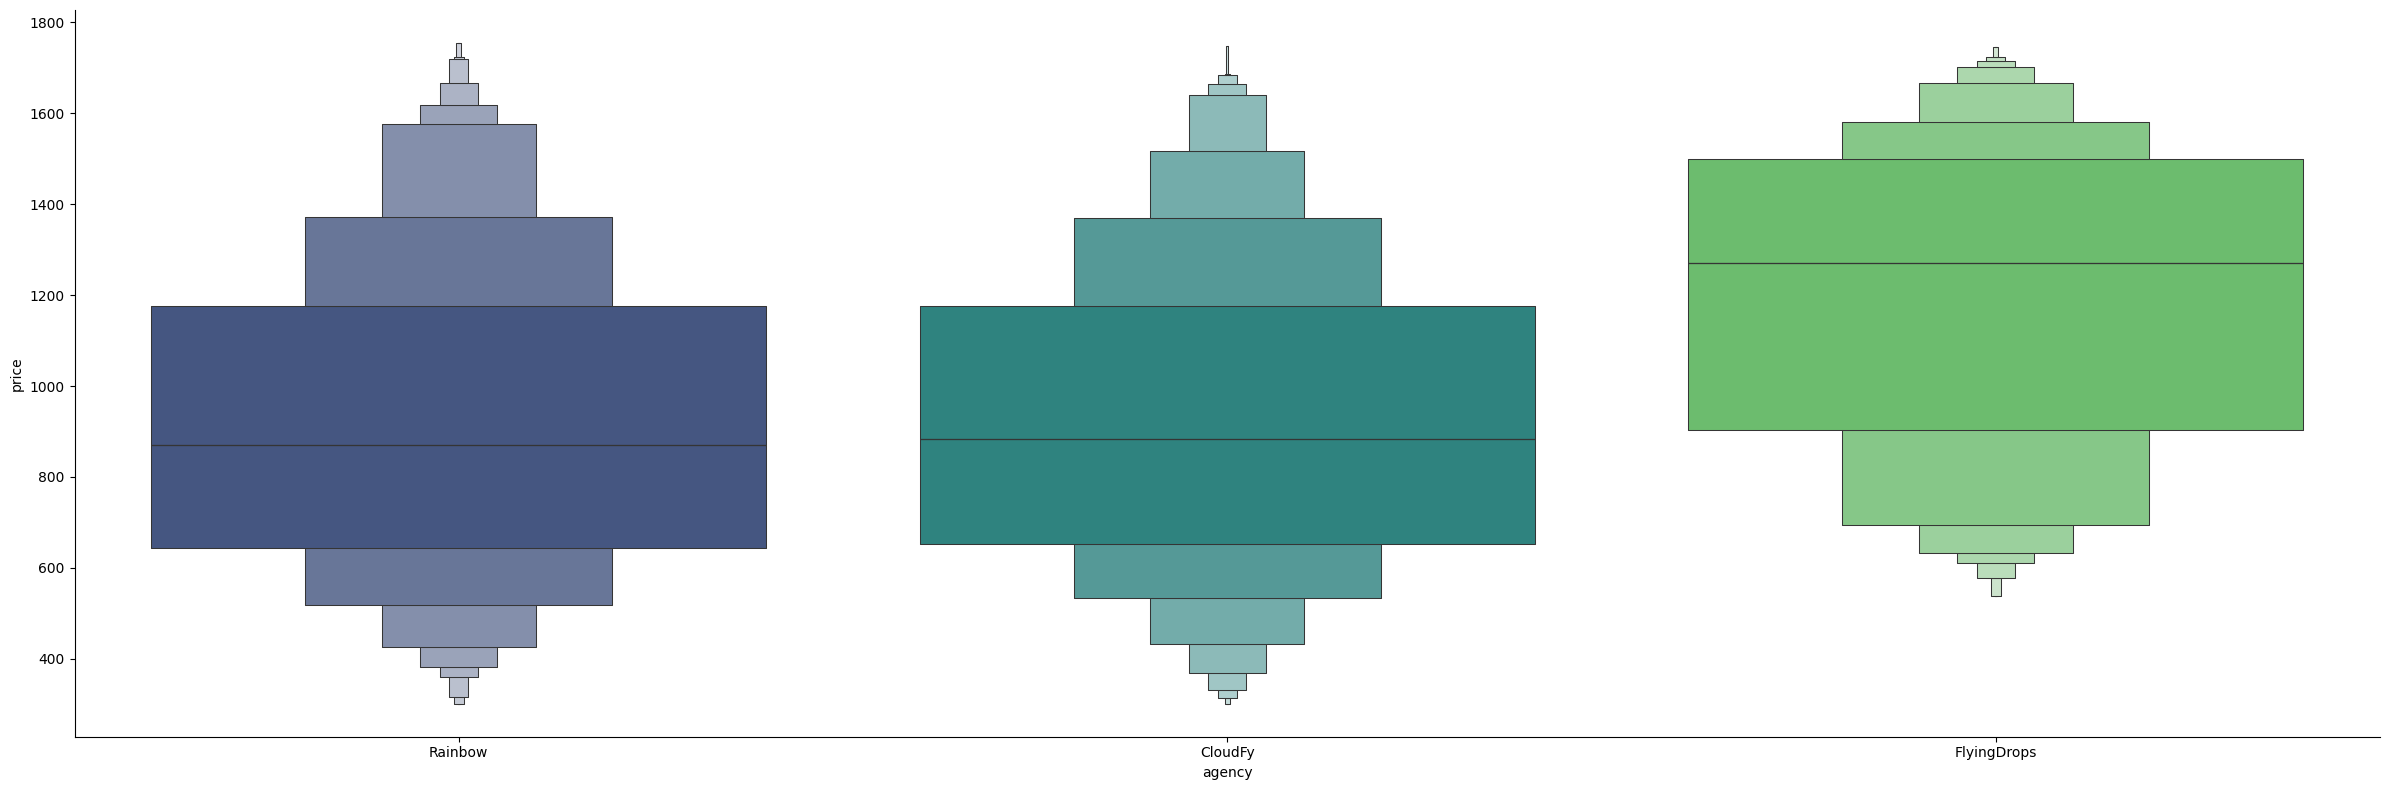

In [45]:
# Chart - 1 visualization

sns.catplot(y = "price", x = "agency", data = flights_df.sort_values("price", ascending = False), kind="boxen", height = 8, aspect = 3,hue='agency',palette="viridis")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [46]:
agency_counts = flights_df['agency'].value_counts()

In [47]:
agency_counts

agency
Rainbow        116752
CloudFy        116378
FlyingDrops     38758
Name: count, dtype: int64

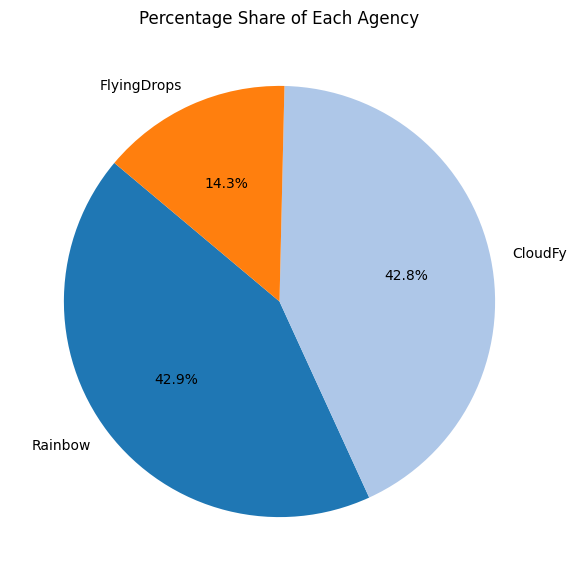

In [48]:
# Chart - 2 visualization code
plt.figure(figsize=(10, 7))
plt.pie(agency_counts, labels=agency_counts.index,autopct='%1.1f%%',  startangle=140,colors=plt.get_cmap('tab20').colors)
plt.title('Percentage Share of Each Agency')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [49]:
flight_counts = flights_df['from'].value_counts().reset_index()
flight_counts.columns = ['airportname', 'total_flights']

In [50]:
flight_counts

,airportname,total_flights
0,Florianopolis (SC),57317
1,Aracaju (SE),37224
2,Campo Grande (MS),34748
3,Brasilia (DF),30779
4,Recife (PE),30480
5,Natal (RN),23796
6,Sao Paulo (SP),23625
7,Salvador (BH),17104
8,Rio de Janeiro (RJ),16815


In [51]:
# Chart - 3 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

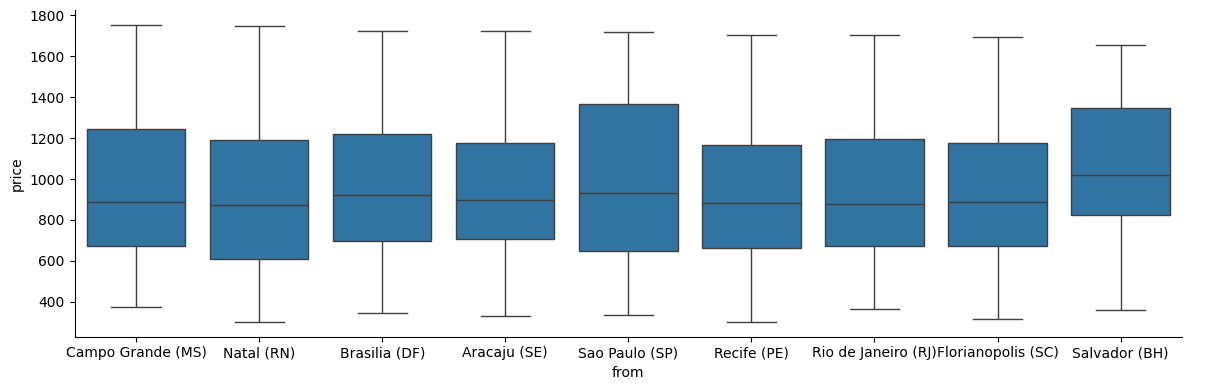

In [98]:
# Chart - 4 visualization code
sns.catplot(y = "price", x = "from", data = flights_df.sort_values("price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

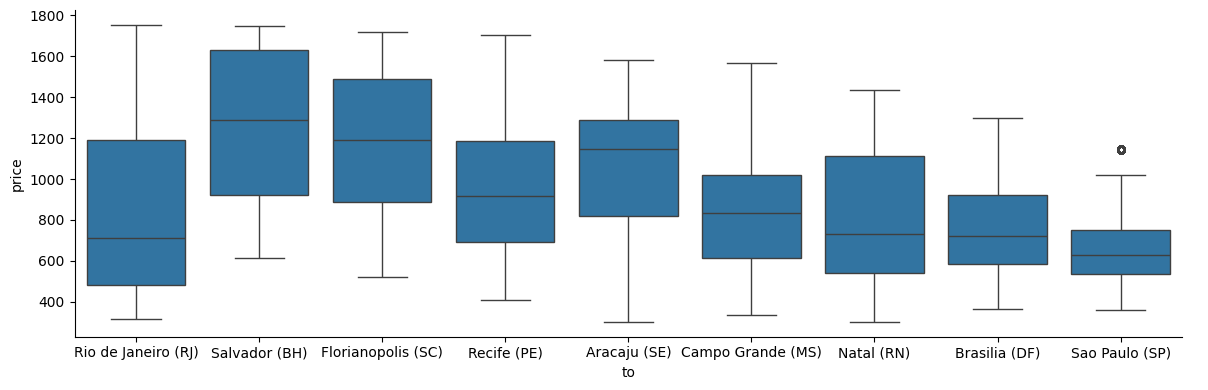

In [53]:
# Chart - 5 visualization code
sns.catplot(y = "price", x = "to", data = flights_df.sort_values("price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [99]:
type_count=flights_df['flightType'].value_counts()

In [100]:
type_count

flightType
firstClass    116418
premium        78004
economic       77466
Name: count, dtype: int64

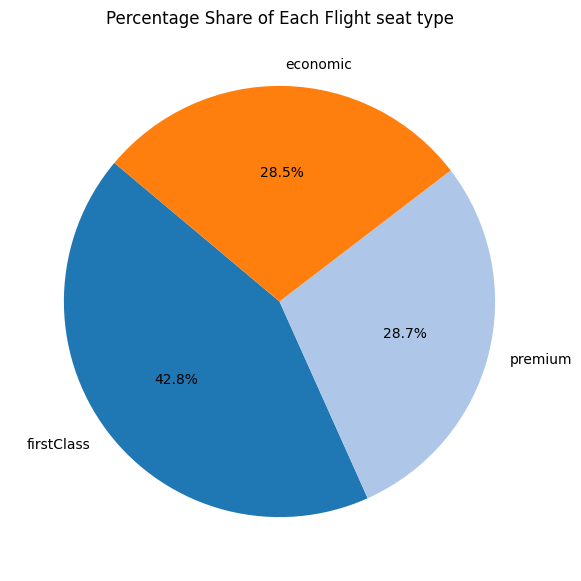

In [102]:
# Chart - 6 visualization code
plt.figure(figsize=(10, 7))
plt.pie(type_count, labels=type_count.index,autopct='%1.1f%%',  startangle=140,colors=plt.get_cmap('tab20').colors)
plt.title('Percentage Share of Each Flight seat type')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

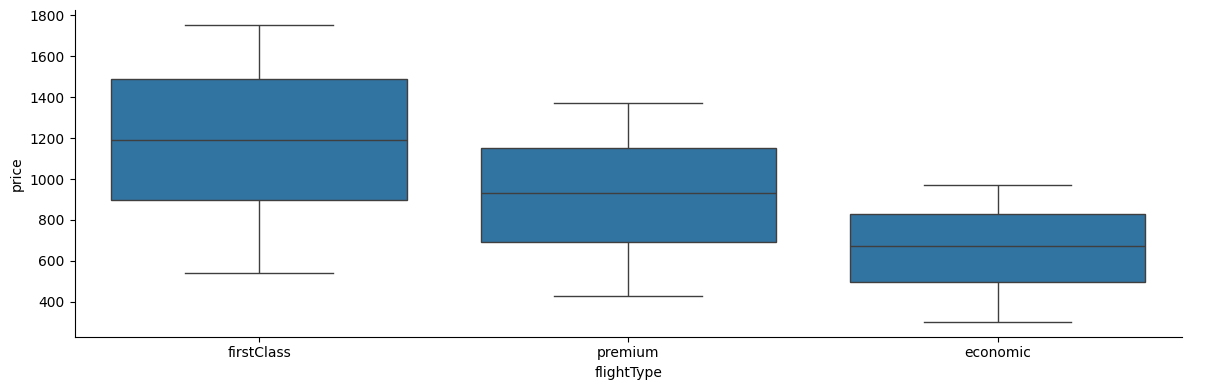

In [103]:
# Chart - 7 visualization code
sns.catplot(y = "price", x = "flightType", data = flights_df.sort_values("price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

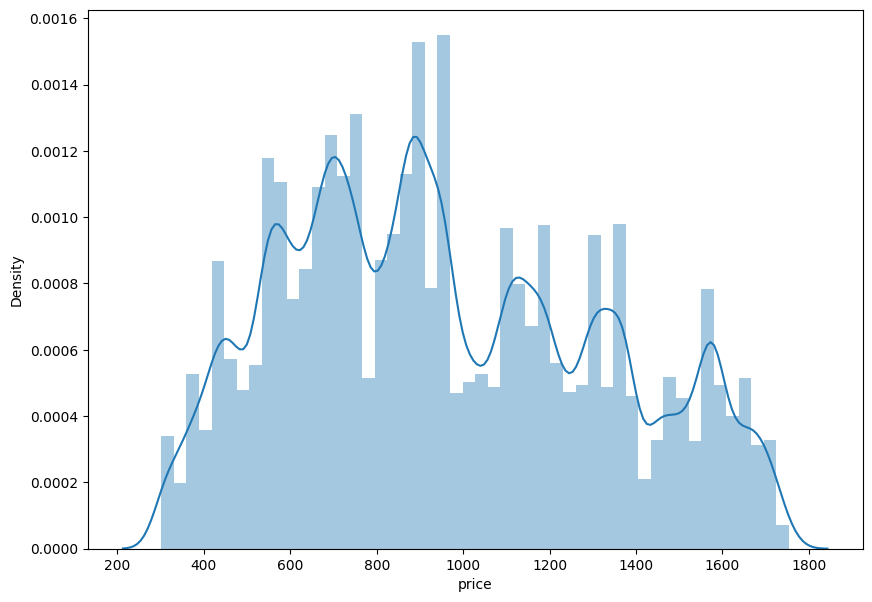

In [104]:
# Chart - 8 visualization code
plt.figure(figsize=(10, 7))
sns.distplot(flights_df['price'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [105]:
flights_df.head()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date,route,total_time
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019,Recife (PE)-Florianopolis (SC),136
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019,Florianopolis (SC)-Recife (PE),136
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019,Brasilia (DF)-Florianopolis (SC),125
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019,Florianopolis (SC)-Brasilia (DF),125
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019,Aracaju (SE)-Salvador (BH),136


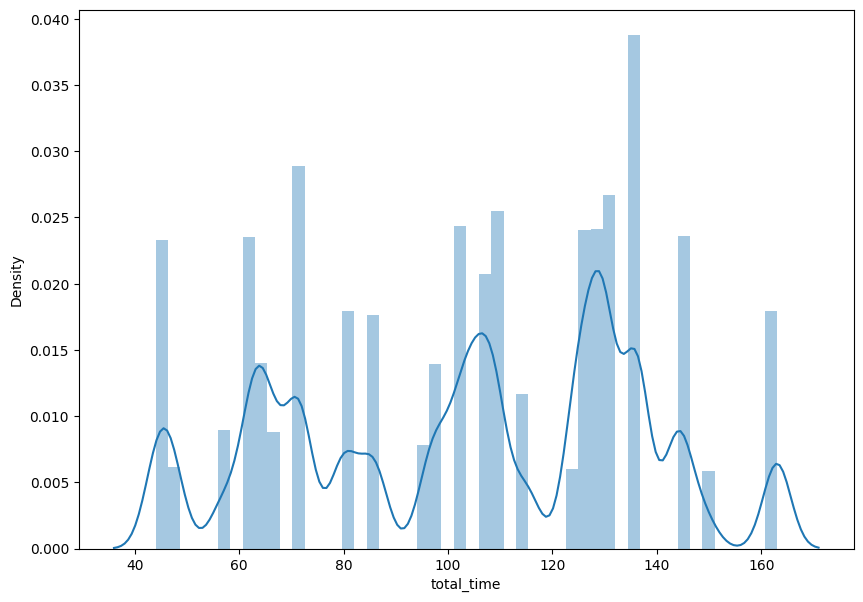

In [106]:
# Chart - 9 visualization code
plt.figure(figsize=(10, 7))
sns.distplot(flights_df['total_time'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

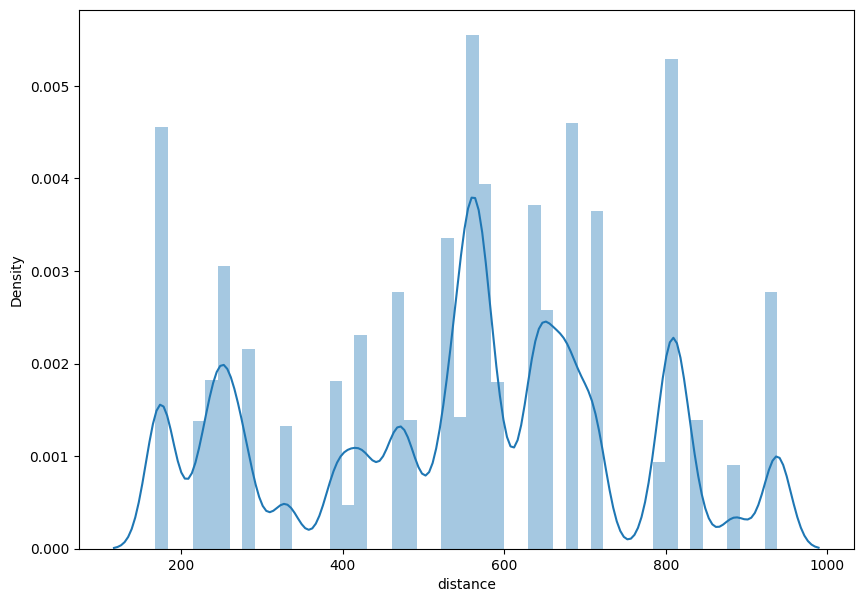

In [107]:
# Chart - 10 visualization code
plt.figure(figsize=(10, 7))
sns.distplot(flights_df['distance'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

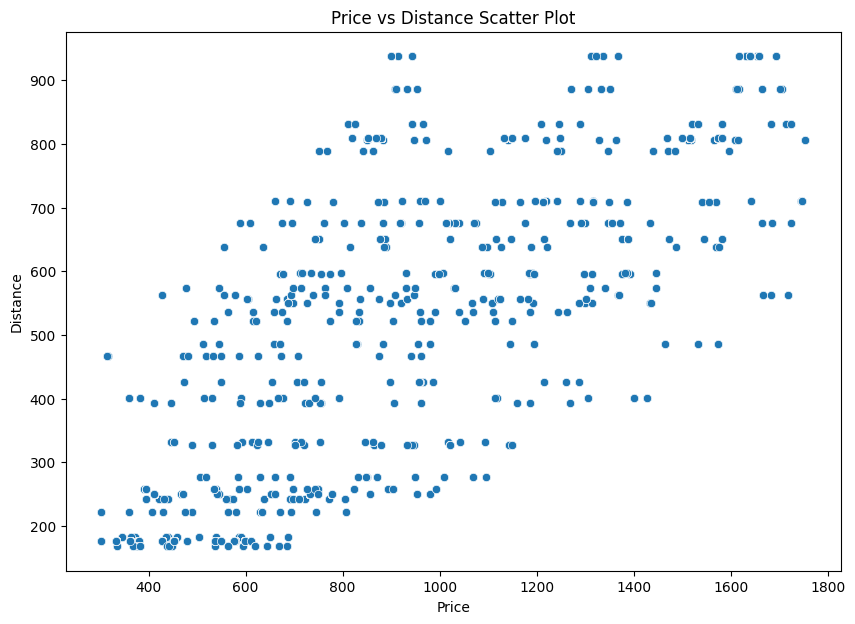

In [113]:
# Chart - 11 visualization code
# Create a scatter plot
plt.figure(figsize=(10, 7))
sns.scatterplot(x="price", y="distance", data=flights_df)
plt.xlabel("Price")
plt.ylabel("Distance")
plt.title("Price vs Distance Scatter Plot")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [60]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [61]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [62]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [63]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [64]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [65]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [66]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [67]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [68]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [69]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [70]:
# Expand Contraction

#### 2. Lower Casing

In [71]:
# Lower Casing

#### 3. Removing Punctuations

In [72]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [73]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [74]:
# Remove Stopwords

In [75]:
# Remove White spaces

#### 6. Rephrase Text

In [76]:
# Rephrase Text

#### 7. Tokenization

In [77]:
# Tokenization

#### 8. Text Normalization

In [78]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [79]:
# POS Taging

#### 10. Text Vectorization

In [80]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [81]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [82]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [83]:
# Transform Your data

### 6. Data Scaling

In [84]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [85]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [86]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [87]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [88]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [89]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [90]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [91]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [92]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [93]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [94]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [95]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [96]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [97]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***